In [1]:
import pandas as pd
from resource_consolidation import Resources, Trip

In [2]:
url = 'https://data.wprdc.org/dataset/healthyride-trip-data'
resource_extension = '/dataset/healthyride-trip-data/resource/'
resource_calling_string = 'https://data.wprdc.org/api/3/action/datastore_search?resource_id='


In [3]:
#create empty container for data 
data_container = Resources(url, resource_extension, resource_calling_string)
#create json string with data from API
json_list = data_container.create_json()

working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=79fc7302-7991-4b5a-b27a-d7c4f21b5b8d
of length: 12225
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=c85436af-ba38-4d91-967f-3e11e4d62a43
of length: 500000
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=a077921d-ae97-48fd-a85d-b31395245ae1
of length: 29811
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=45bd5889-8ea1-4e71-ba83-f8103725e5d8
of length: 10448
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=92a1a819-2750-4625-88e3-48cf3dd87794
of length: 9841
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=7f68c23c-7ba3-4e5c-862d-e0cdc7ec2b67
of length: 38007
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=ebd54bd3-6e46-4941-af21-65bdc3fb4ced
of length:

In [4]:
print(json_list[0])


{'Trip id': '91343735', 'Bikeid': '70352', 'To station name': '21st St & Penn Ave', 'Usertype': 'Customer', 'Stoptime': '1/2/2020 17:11', 'From station name': 'Wood St & Sixth Ave', 'Starttime': '1/2/2020 17:02', 'To station id': '1017', 'Tripduration': '571', '_id': 1, 'From station id': '1056'}


In [5]:
#convert list of dicts to list of objects called "Trips"
Trip_list = []
for dict in json_list:
    li = list(dict.values())
    Trip_list.append(Trip(*li))

In [6]:
#test er out
print(Trip_list[420])
print(Trip_list[420].toname)
print(Trip_list[420].starttime)
print(Trip_list[420].weekday)

Hot Metal St & Tunnel Blvd
2/11/2020 8:03
Tuesday


In [7]:
def sort_by_stations(station_ids, Trip_list):
    master_to = []
    master_from = []
    for station in station_ids:
        master_to += [i for i in Trip_list if i.toid == station]
        master_from += [i for i in Trip_list if i.fromid == station]
    return master_to, master_from



pnc_station_ids = ['49941','49921', '1012']

downtown_station_ids = ['1000', '49701', '1002', '1001', '49691', '49671', '1056', '1003', '49731', '1004', '1006', '49651', '1010']

station_trip_list_to = sort_by_stations(downtown_station_ids, Trip_list)[0]
station_trip_list_from = sort_by_stations(downtown_station_ids, Trip_list)[1]

print(len(station_trip_list_to))
print(len(station_trip_list_from))


109895
105817


In [8]:
class Day:
    #date is the day, arrivals is list of arrivals, departures is list of departures
    def __init__ (self, date, arrivals = [], departures = []):
        self.date = date
        self.arrivals = arrivals
        self.departures = departures

In [9]:
def departure_params_todict(list_of_trip_objects):
    daily_dict = {}
    for trip in list_of_trip_objects:
        this_day = trip.starttime.split(" ")[0]
        if this_day not in list(daily_dict.keys()):
            daily_dict[this_day] = [trip.starttime.split(" ")[1]]
        else:
            daily_dict[this_day].append(trip.starttime.split(" ")[1])
    return daily_dict

def arrival_params_todict(list_of_trip_objects):
    daily_dict = {}
    for trip in list_of_trip_objects:
        this_day = trip.stoptime.split(" ")[0]
        if this_day not in list(daily_dict.keys()):
            daily_dict[this_day] = [trip.stoptime.split(" ")[1]]
        else:
            daily_dict[this_day].append(trip.stoptime.split(" ")[1])
    return daily_dict


In [10]:
to_dict = arrival_params_todict(station_trip_list_to)
from_dict = departure_params_todict(station_trip_list_from)

In [11]:
to_dates = list(to_dict.keys())
from_dates = list(from_dict.keys())

unique_to_arrivals = [i for i in to_dates if i not in from_dates]
unique_to_departures = [i for i in from_dates if i not in to_dates]

shared_dates = [i for i in to_dates if i not in unique_to_arrivals]


In [12]:
Day_object_list = []

for i in shared_dates:
    Day_object_list.append(Day(i, to_dict[i], from_dict[i]))



In [13]:
search_index = shared_dates.index('5/20/2019')

print(Day_object_list[search_index].date)
print(Day_object_list[search_index].arrivals)
print(Day_object_list[search_index].departures)

5/20/2019
['10:50', '13:45', '7:19', '7:56', '9:12', '12:02', '14:15', '15:10', '15:10', '16:06', '15:54', '18:01', '22:15', '16:06', '9:17', '12:17', '9:02', '13:56', '13:57', '5:53', '8:29', '9:10', '8:56', '10:56', '11:47', '12:07', '13:12', '13:12', '13:57', '15:06', '15:03', '15:03', '22:37', '9:22', '12:10', '8:51', '17:17', '9:12', '13:11', '15:32', '15:34', '15:40', '16:23', '20:17', '10:34', '9:43', '7:43', '17:28', '18:55', '7:01', '7:50', '15:37', '8:13', '17:29', '9:38', '15:53', '15:33', '16:18', '19:13', '18:30', '18:30', '19:53']
['8:31', '10:32', '13:30', '14:22', '14:22', '16:33', '21:35', '21:49', '17:30', '13:01', '19:29', '9:41', '11:13', '11:28', '11:30', '11:30', '16:04', '16:04', '16:22', '16:32', '19:04', '19:45', '20:09', '21:49', '16:55', '9:33', '14:07', '16:51', '17:08', '17:30', '18:06', '10:52', '10:55', '12:55', '15:30', '15:33', '15:35', '15:41', '19:25', '21:38', '16:07', '17:03', '15:39', '17:46', '15:36', '15:36', '16:45', '17:48', '8:52', '15:45', '1

In [14]:
from collections import Counter

def hourly_volume(li):
    hourly_list = sorted([int(i.split(':')[0]) for i in li])
    counted_vals = Counter(hourly_list)
    return counted_vals

arrivals_volume = hourly_volume(Day_object_list[search_index].arrivals)
departures_volume = hourly_volume(Day_object_list[search_index].departures)

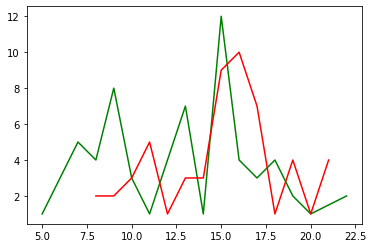

In [15]:
import matplotlib.pylab as plt

def plot_hourly_volume(da, dd):
    listsa = sorted(da.items()) # sorted by key, return a list of tuples
    xa, ya = zip(*listsa) # unpack a list of pairs into two tuples

    listsd = sorted(dd.items()) # sorted by key, return a list of tuples
    xd, yd = zip(*listsd)
    
    plt.plot(xa, ya, "g-")
    plt.plot(xd, yd, 'r-')

    plt.show()

plot_hourly_volume(arrivals_volume, departures_volume)


Unused Functions Below

In [16]:
#def daily_parameters (trip_list):
#    daily_dict = {}
#    previous_day = trip_list[0].starttime[:8]
#    i = 0
#    for trip in trip_list:
#        this_day = trip.starttime.split(" ")[0]
#        if previous_day != trip.starttime[:8]:
#            daily_dict[previous_day] = i
#            i = 0
#        else:
#            i += 1
#        previous_day = this_day
#    return daily_dict

In [17]:
#create json string from json list
#jsonStr = dumps(json_list)
#create dataframe with data from json string
#df = pd.read_json(jsonStr)
#double checking head of dataframe to see if it correctly combined
#print(df.head(n=10))